In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

In [4]:
csv_in1 = '3402_2018.csv' #toray
csv_in2= '1377_2018.csv'#sakata

In [11]:
#specify header = 0 to be able to replace it later
df1 = pd.read_csv(csv_in1, sep=',', skiprows=3, header=0)
display(df1.shape)
display(df1.head())

(245, 7)

,Date,Open,High,Low,Close,Volume,AdjClose
0,2018-01-04,1074.5,1094.0,1074.0,1094.0,6985400,1094.0
1,2018-01-05,1096.0,1099.5,1091.5,1097.0,4591200,1097.0
2,2018-01-09,1105.5,1126.0,1104.5,1120.0,9251300,1120.0
3,2018-01-10,1124.0,1137.0,1118.0,1125.5,6821400,1125.5
4,2018-01-11,1120.0,1122.5,1112.0,1119.5,4316700,1119.5


In [17]:
#converting 'Date' column from string to pd datetime type
df1["Date"] = pd.to_datetime(df1['Date'])
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      245 non-null    datetime64[ns]
 1   Open      245 non-null    float64       
 2   High      245 non-null    float64       
 3   Low       245 non-null    float64       
 4   Close     245 non-null    float64       
 5   Volume    245 non-null    int64         
 6   AdjClose  245 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.5 KB
None


pandas.core.series.Series

In [23]:
#df2: loading data and converting type, same as above
df2 = pd.read_csv(csv_in2,sep=',', skiprows=3, header=0)
df2["Date"] = pd.to_datetime(df2["Date"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      245 non-null    datetime64[ns]
 1   Open      245 non-null    int64         
 2   High      245 non-null    int64         
 3   Low       245 non-null    int64         
 4   Close     245 non-null    int64         
 5   Volume    245 non-null    int64         
 6   AdjClose  245 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 13.5 KB


#### Plotting time series data

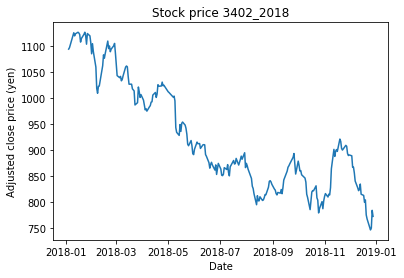

In [28]:
plt.plot(df1['Date'], df1['AdjClose'])
plt.title('Stock price 3402_2018')
plt.xlabel('Date')
plt.ylabel('Adjusted close price (yen)')
plt.show()

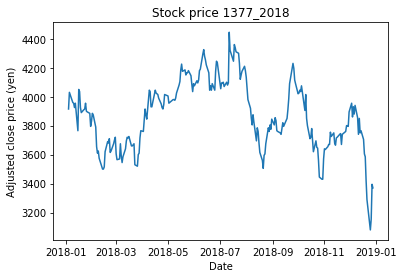

In [29]:
plt.plot(df2['Date'], df2['AdjClose'])
plt.title('Stock price 1377_2018')
plt.xlabel('Date')
plt.ylabel('Adjusted close price (yen)')
plt.show()

#### Histogram

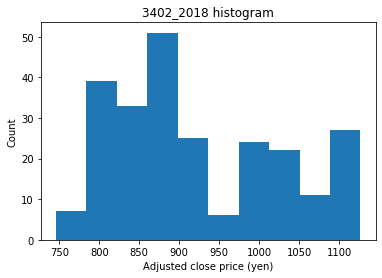

In [34]:
plt.hist(df1["AdjClose"])
plt.title("3402_2018 histogram")
plt.xlabel("Adjusted close price (yen)")
plt.ylabel("Count")
plt.show()

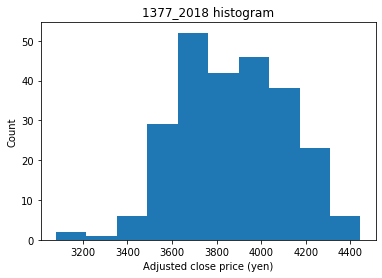

In [36]:
plt.hist(df2["AdjClose"])
plt.title("1377_2018 histogram")
plt.xlabel("Adjusted close price (yen)")
plt.ylabel("Count")
plt.show()

#### Stats

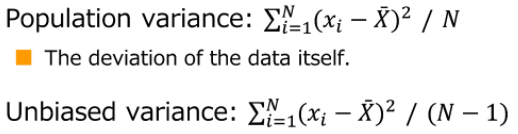

In [41]:
print("Average df1", df1["AdjClose"].mean())

# pandas.dataframe.var = variance have delta degree of freedom = 0 
# which is a divisor in the variance calculation
# which is .../(N - ddof)
print("Population variance df1", df1["AdjClose"].var(ddof = 0))
print("Standard deviation df1", df1["AdjClose"].std(ddof = 0))

Average df1 923.0183673469388
Population variance df1 10672.067785089546
Standard deviation df1 103.30570064178234


In [42]:
print("Average df2", df2["AdjClose"].mean())
print("Population variance df2", df2["AdjClose"].var(ddof = 0))
print("Standard deviation df2", df2["AdjClose"].std(ddof = 0))

Average df2 3869.9795918367345
Population variance df2 55513.97917534361
Standard deviation df2 235.61404706711272


#### variation = std/mean

##### Since we're looking at the population, we're going with ddof = 0
##### Unbiased ddof = 1

In [44]:
#ss.variation() uses unbiased std


print('Coeff. of variation1: ', ss.variation(df1["AdjClose"]))
print('Coeff. of variation2: ', ss.variation(df2["AdjClose"]))

Coeff. of variation1:  0.11192160881772831
Coeff. of variation2:  0.060882503764131665


In [46]:
# other method
print('Coeff. of variation1: ', df1['AdjClose'].std(ddof=0) / df1['AdjClose'].mean())
print('Coeff. of variation2: ', df2['AdjClose'].std(ddof=0) / df2['AdjClose'].mean())

Coeff. of variation1:  0.11192160881772831
Coeff. of variation2:  0.060882503764131665


### Absolute comparison between two datasets

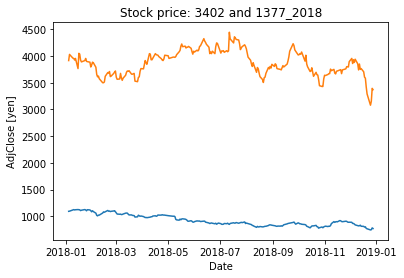

In [52]:
plt.plot(df1['Date'],df1['AdjClose'], label = '3402_2018')
plt.plot(df2['Date'],df2['AdjClose'], label = '1377_2018')
plt.title('Stock price: 3402 and 1377_2018')
plt.xlabel('Date')
plt.ylabel('AdjClose [yen]')
plt.show()

### Relative comparison between two datasets
#### At the Y axis, we're dividing df2['AdjClose'] / df2.at[0, 'AdjClose']
##### df2.at[0, 'AdjClose'] <=> df2['AdjClose][0] = 1094.0
##### We're dividing every element in df2['AdjClose'] with a constant, so that the fuctuations are projected better

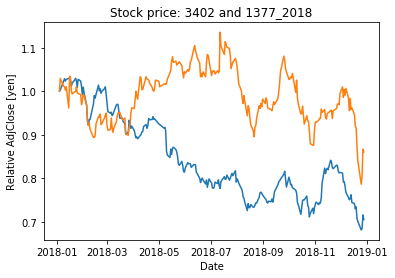

In [55]:
plt.plot(df1['Date'],df1['AdjClose'] / df1.at[0,'AdjClose'], label = '3402_2018')
plt.plot(df2['Date'],df2['AdjClose'] / df2.at[0,'AdjClose'], label = '1377_2018')
plt.title('Stock price: 3402 and 1377_2018')
plt.xlabel('Date')
plt.ylabel('Relative AdjClose [yen]')
plt.show()

#### Correlation coefficient between two stock prices
##### Merge on 'Date' criteria, inner join

In [59]:
df12 = pd.merge(df1, df2, on='Date', how = 'inner')
print(df12.shape)
df12.head()

(245, 13)


,Date,Open_x,High_x,Low_x,Close_x,Volume_x,AdjClose_x,Open_y,High_y,Low_y,Close_y,Volume_y,AdjClose_y
0,2018-01-04,1074.5,1094.0,1074.0,1094.0,6985400,1094.0,3910,3915,3880,3915,90700,3915
1,2018-01-05,1096.0,1099.5,1091.5,1097.0,4591200,1097.0,3970,4060,3965,4030,157200,4030
2,2018-01-09,1105.5,1126.0,1104.5,1120.0,9251300,1120.0,4030,4050,3950,3960,88300,3960
3,2018-01-10,1124.0,1137.0,1118.0,1125.5,6821400,1125.5,3980,3995,3950,3955,68500,3955
4,2018-01-11,1120.0,1122.5,1112.0,1119.5,4316700,1119.5,3950,3960,3885,3925,116700,3925


 ##### Pearson's correlation coefficient 

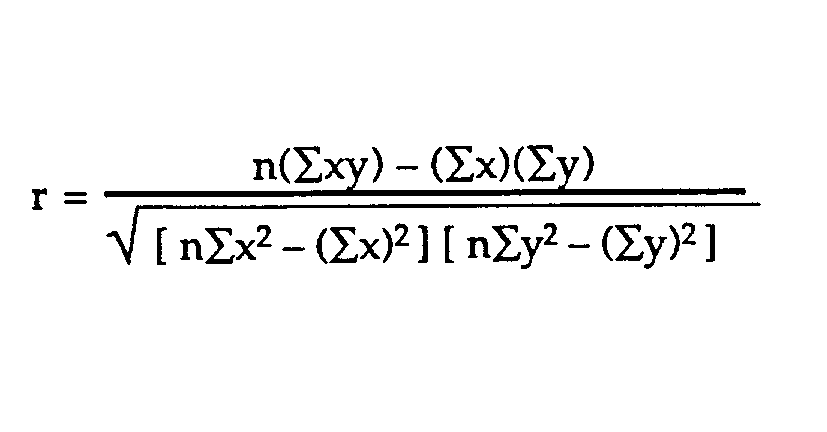

In [62]:
print(df12["AdjClose_x"].corr(df12["AdjClose_y"]))

0.03692588182255975


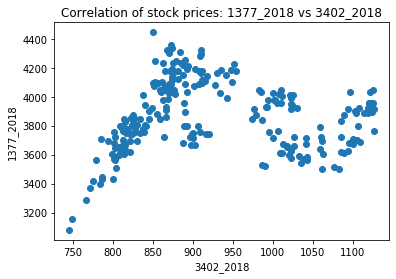

In [64]:
plt.scatter(df12['AdjClose_x'], df12['AdjClose_y'])
plt.title('Correlation of stock prices: 1377_2018 vs 3402_2018')
plt.xlabel('3402_2018')
plt.ylabel('1377_2018')
plt.show()